In [1]:
%matplotlib inline

In [48]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (0.89 * 12, 6)
plt.style.use('fivethirtyeight')

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [ ]:
plt.style.available

In [3]:
def data_to_df(data):
    columns = data.feature_names + ['target']
    vals = np.hstack((data.data, np.atleast_2d(data.target).T))
    return pd.DataFrame(vals, columns=columns)

# A Working Knowledge of Machine Learning

<img src="https://imgs.xkcd.com/comics/machine_learning.png" />

# Software Engineering

<img src="http://leansoftwareengineering.com/wp-content/uploads/2009/06/symmetric-workflow.png" />

# Machine Learning Engineering

<img src="box_loop.png" />

# Examples of ML Products

- Predictive texting
- Spam filters
- Netflix recommendations
- Ads following you on the internet
- Facial recognition
- Election forecasts
- Self driving cars
- Discover Weekly
- Photo search

## How is machine learning being used?

- Regression, classification, and clustering
- Analysis vs product
- Explainable vs accurate
- Batch vs streaming


# Regression, Classification, and Clustering

## Regression
- How much?
- Can often be turned into a classification problem

## Classification
- Which group does this belong to?

# Clustering
- Are there groups here?
- "Unsupervised classification"

## Analysis vs product

### Analysis
- "Data science"
- Statistics
- Tools like Excel, Tableau, Jupyter notebooks

### Product
- "Machine Learning"
- Algorithms
- Requires deploy step
- Tools like Python, R, Scala

# Explainable vs Accurate

## Explainable algorithms:
- Linear models
- Decision trees

## Accurate algorithms
- Neural networks
- Random forests

### Interactive models help bridge the gap?

# Batch vs streaming

## Streaming
- Update predictions in the presence of data
- Must make strong stationarity assumptions, or plan for changing data

## Batch
- Easier to plan
- Still need to verify model assumptions over time

### How can the two be mixed?

# Sample Data

In [4]:
from sklearn.datasets import load_boston, load_iris

iris = load_iris()
iris_df = data_to_df(iris)
iris_df['target_name'] = iris.target_names[iris['target']]

In [5]:
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0     0.0      setosa  
1     0.0      setosa  
2     0.0      setosa  
3     0.0      setosa  
4     0.0      setosa

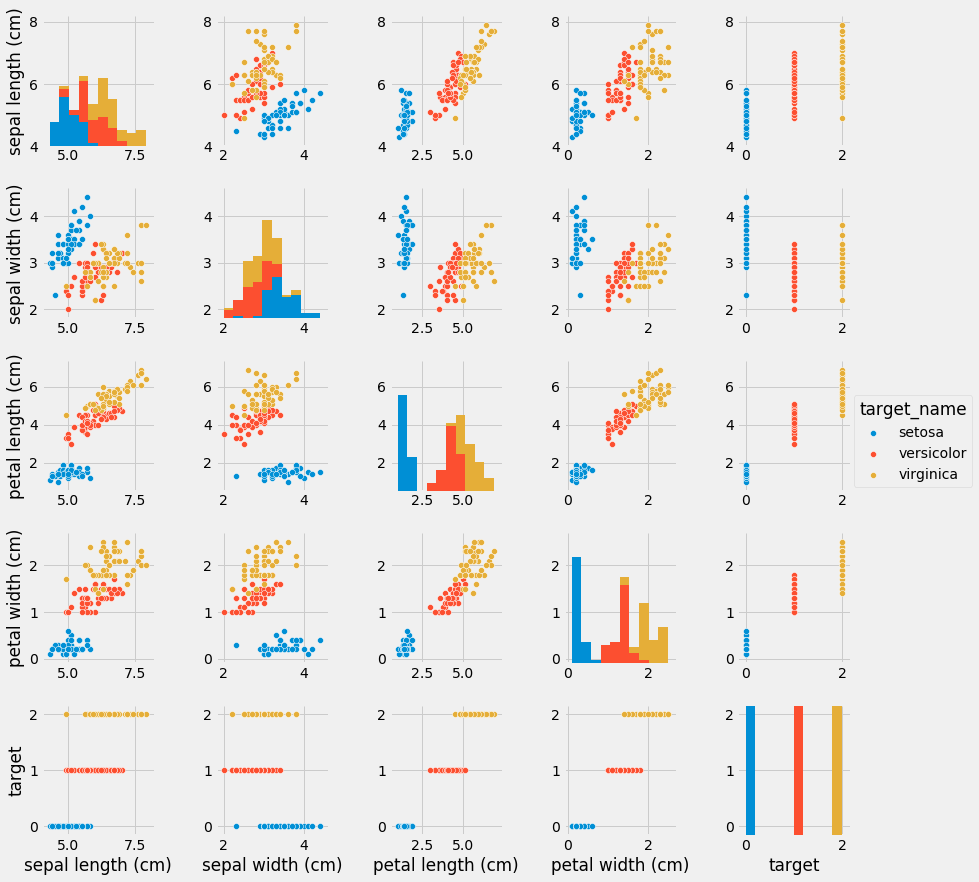

In [6]:
sns.pairplot(iris_df, hue='target_name');


# Heuristics

- K-Means
- KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [8]:
knn = KNeighborsClassifier().fit(iris.data, iris.target)
wrong = iris_df.iloc[knn.predict(iris.data) != iris.target]
print(confusion_matrix(iris.target, knn.predict(iris.data)))

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


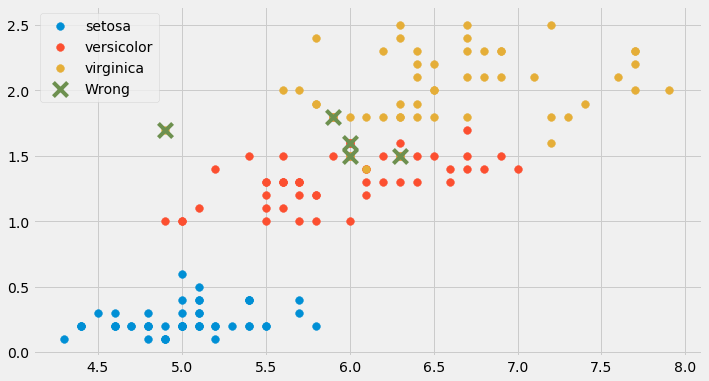

In [9]:
fig, ax = plt.subplots()
x = 'sepal length (cm)'
y = 'petal width (cm)'
for name, group in iris_df.groupby('target_name'):
    size = group.shape[0]
    ax.scatter(group[x], group[y], s=60, label=name)
ax.scatter(wrong[x], wrong[y], s=200, marker='x', label='Wrong')
ax.legend();

In [10]:
kmeans = KMeans(n_clusters=3).fit(iris.data) # note: unsupervised

In [11]:
confusion_matrix(iris.target, kmeans.predict(iris.data))

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])

# Classification

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [49]:
random_forest = RandomForestClassifier().fit(iris.data, iris.target)
confusion_matrix(iris.target, random_forest.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [14]:
linear = LogisticRegression().fit(iris.data, iris.target)
confusion_matrix(iris.target, linear.predict(iris.data))

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]])

In [15]:
bayes = MultinomialNB().fit(iris.data, iris.target)
confusion_matrix(iris.target, bayes.predict(iris.data))

array([[50,  0,  0],
       [ 0, 46,  4],
       [ 0,  3, 47]])

# Regression Models


In [16]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split

In [17]:
boston = load_boston()
boston_frame = pd.DataFrame(boston.data, columns=boston.feature_names)

In [50]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [18]:
boston_frame.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

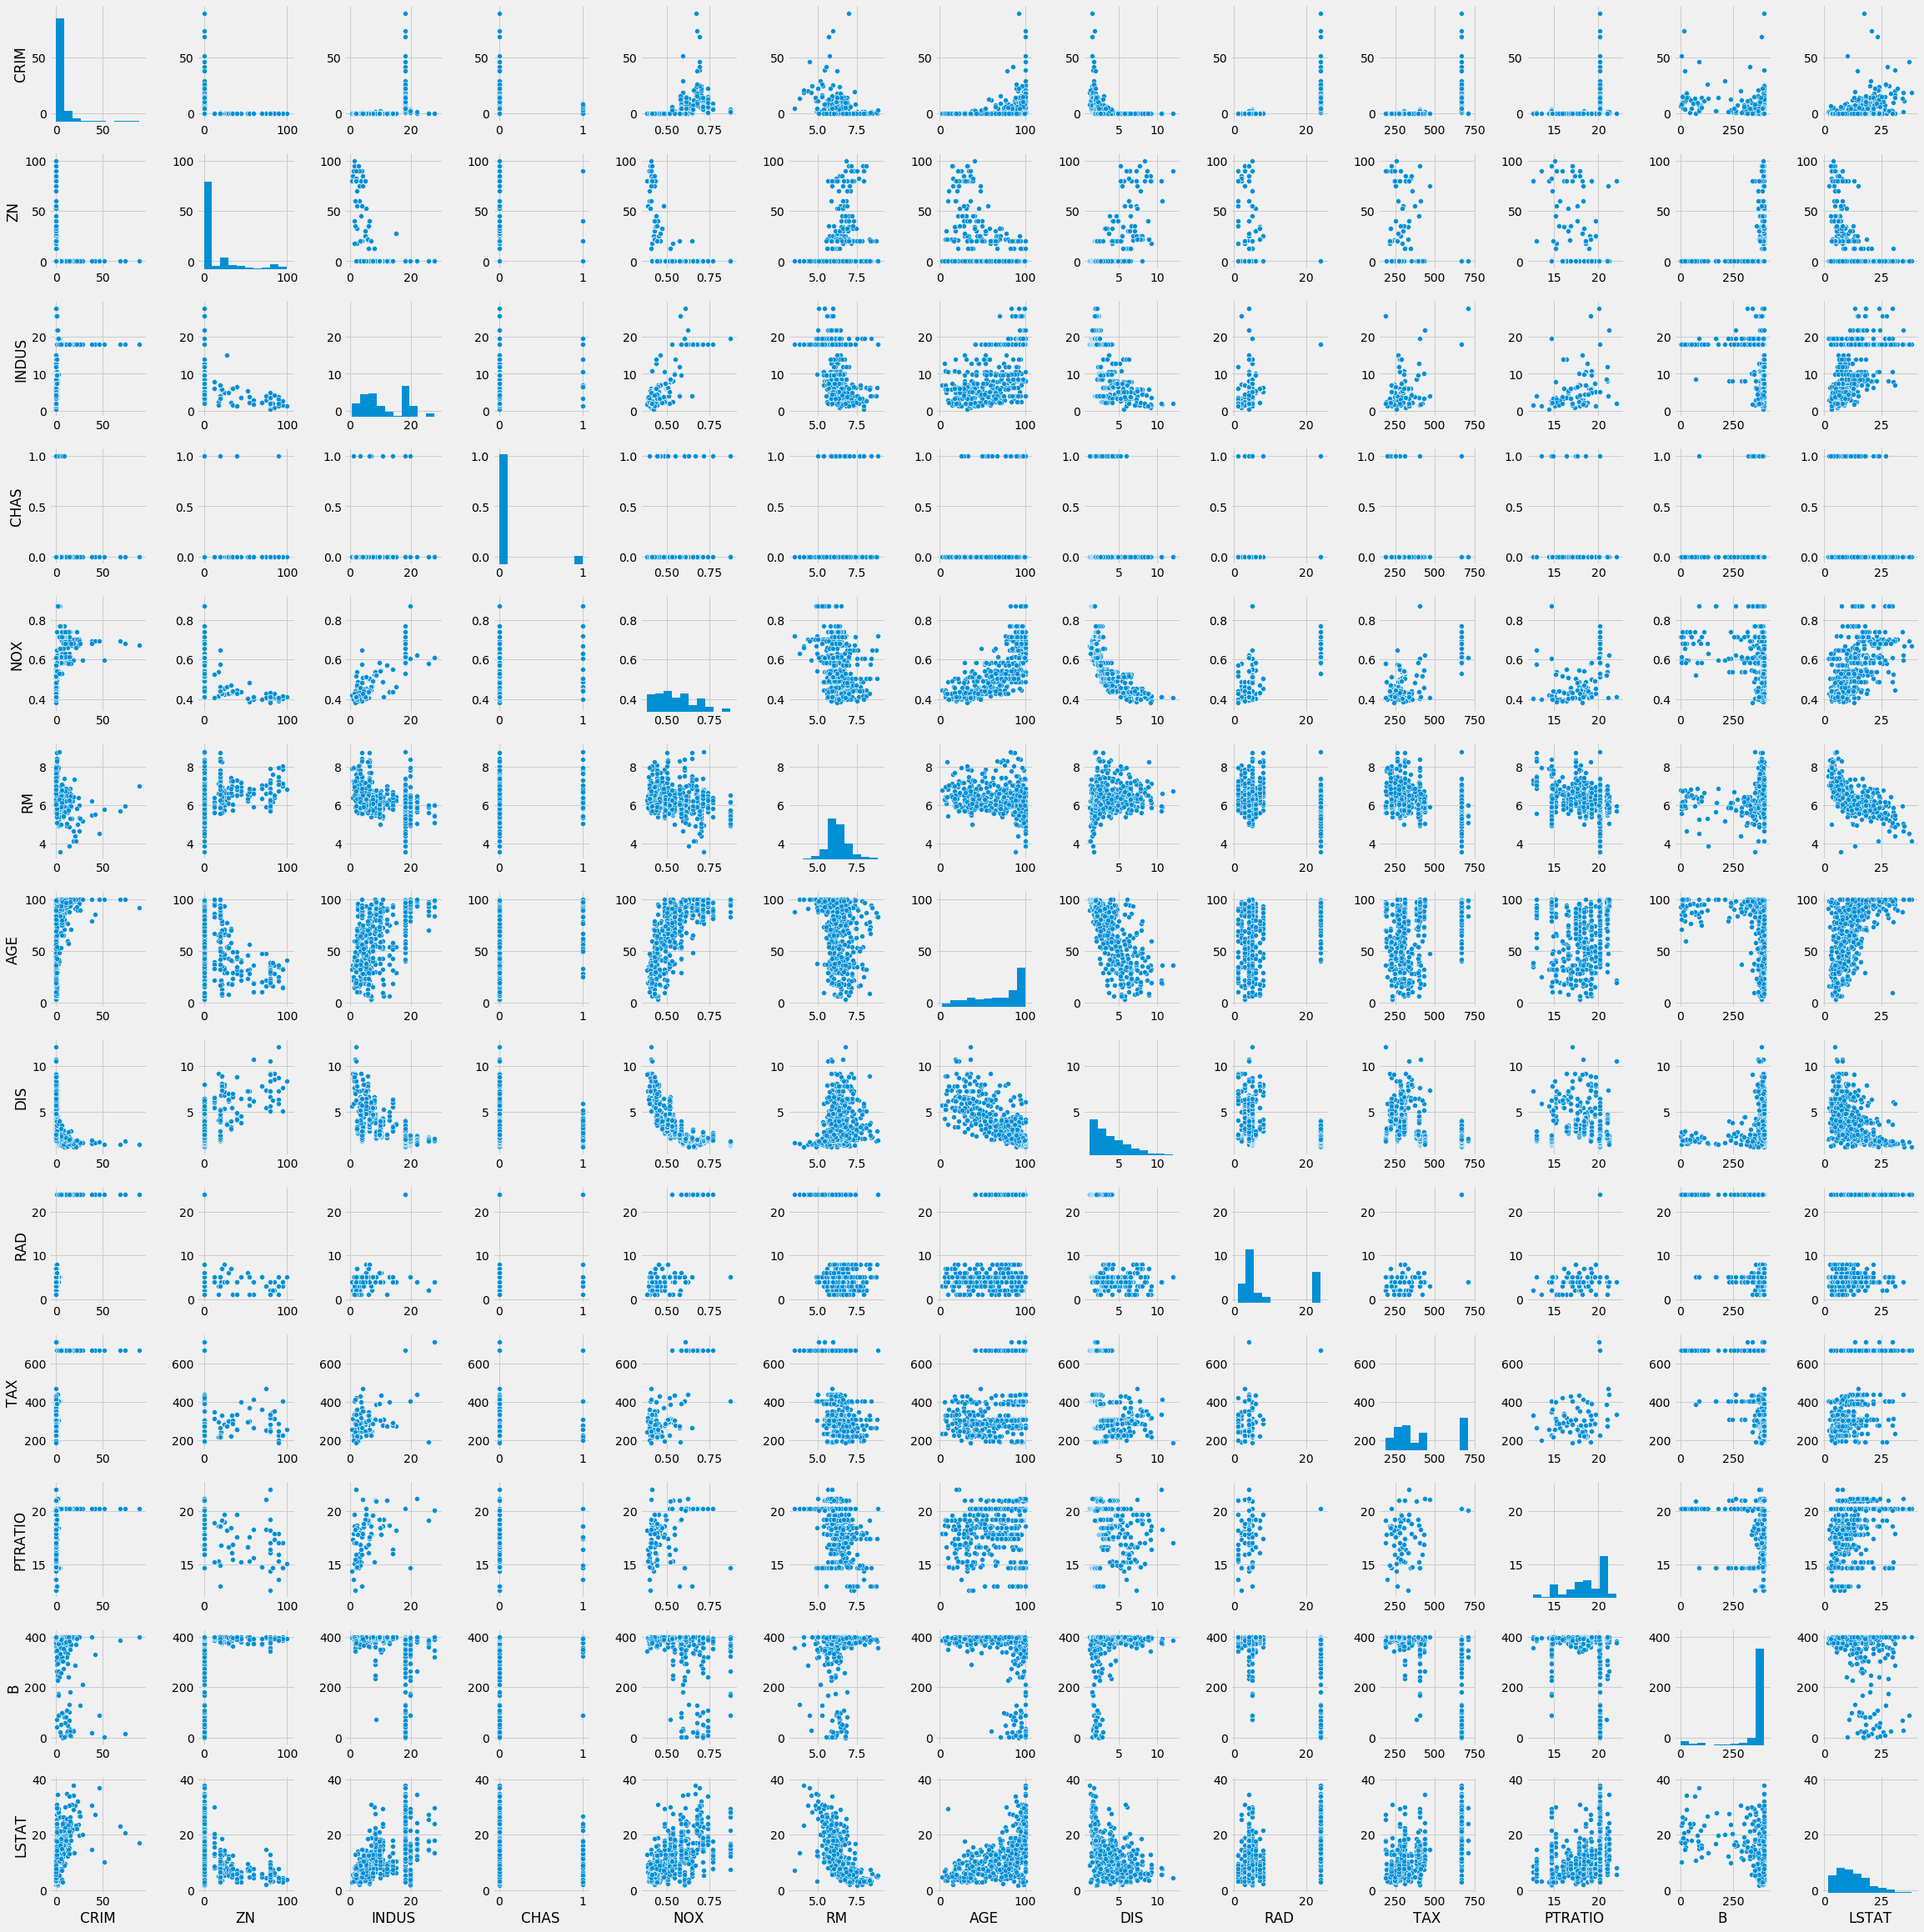

In [19]:
sns.pairplot(boston_frame);

In [20]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [21]:
train_X, test_X, train_y, test_y = train_test_split(boston.data, boston.target, test_size=100)

In [22]:
reg = LinearRegression().fit(train_X, train_y)

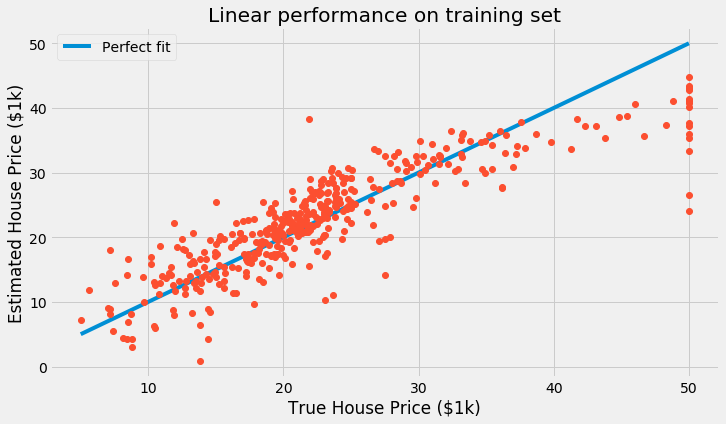

In [23]:
line = np.linspace(train_y.min(), train_y.max())
plt.plot(line, line, label='Perfect fit')
plt.plot(train_y, reg.predict(train_X), 'o')
plt.legend()
plt.title('Linear performance on training set')
plt.xlabel('True House Price ($1k)')
plt.ylabel('Estimated House Price ($1k)');

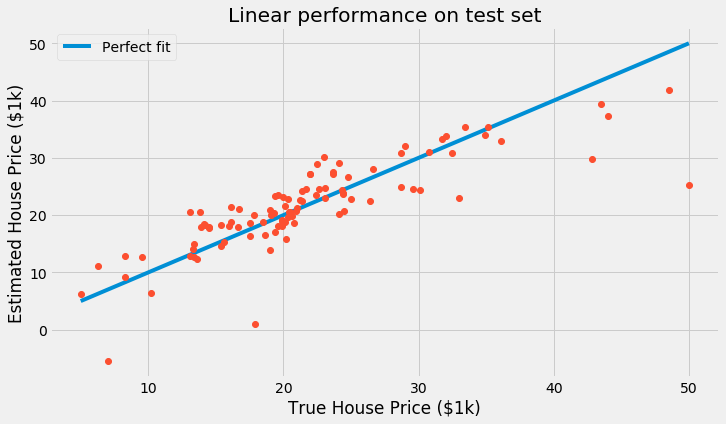

In [24]:
line = np.linspace(test_y.min(), test_y.max())
plt.plot(line, line, label='Perfect fit')
plt.plot(test_y, reg.predict(test_X), 'o')
plt.legend()
plt.title('Linear performance on test set')
plt.xlabel('True House Price ($1k)')
plt.ylabel('Estimated House Price ($1k)');

In [25]:
reg.score(train_X, train_y)

0.75033805095638018

In [26]:
reg.score(test_X, test_y)

0.68169757469525549

# Overfitting

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly_transform = PolynomialFeatures(3)
poly_train_X = poly_transform.fit_transform(train_X)
poly_reg = LinearRegression().fit(poly_train_X, train_y)

In [29]:
poly_reg.score(poly_train_X, train_y)

0.999999999999999

In [30]:
poly_reg.score(poly_transform.transform(test_X), test_y)

-2121.4841274394826

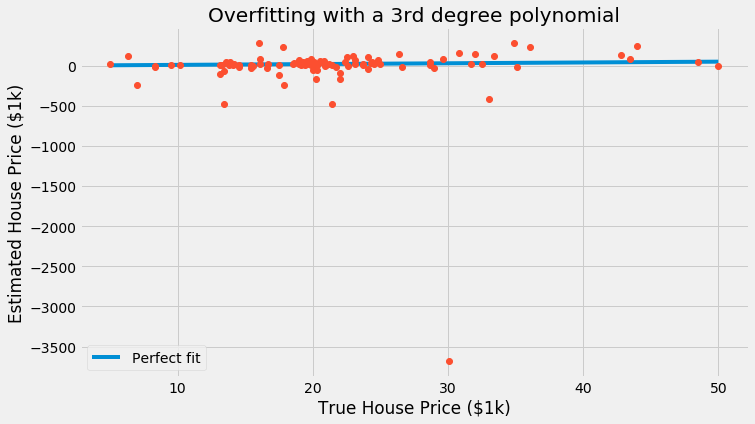

In [31]:
line = np.linspace(test_y.min(), test_y.max())
plt.plot(line, line, label='Perfect fit')
plt.plot(test_y, poly_reg.predict(poly_transform.transform(test_X)), 'o')
plt.legend()
plt.title('Overfitting with a 3rd degree polynomial')
plt.xlabel('True House Price ($1k)')
plt.ylabel('Estimated House Price ($1k)');

In [32]:
ridge_poly_reg = Ridge(alpha=100, solver='lsqr').fit(poly_train_X, train_y)

In [33]:
ridge_poly_reg.score(poly_transform.transform(test_X), test_y)

0.69684765352483402

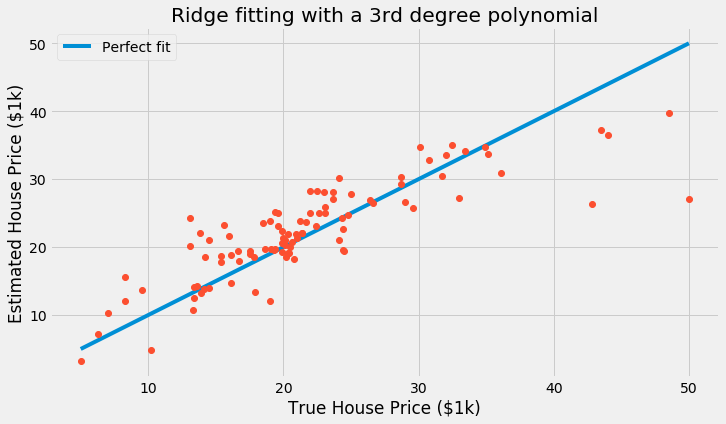

In [34]:
line = np.linspace(test_y.min(), test_y.max())
plt.plot(line, line, label='Perfect fit')
plt.plot(test_y, ridge_poly_reg.predict(poly_transform.transform(test_X)), 'o')
plt.legend()
plt.title('Ridge fitting with a 3rd degree polynomial')
plt.xlabel('True House Price ($1k)')
plt.ylabel('Estimated House Price ($1k)');

# Natural Language Processing

In [35]:
text = """The MIT Media Lab is an interdisciplinary research laboratory at the Massachusetts
Institute of Technology devoted to projects at the convergence of technology, multimedia,
sciences, art and design. Staff and students have backgrounds ranging from electrical engineering 
and computer science to sociology and music and others. The Media Lab has been widely popularized 
since the 1990s by business and technology publications such as Wired and Red Herring for a series 
of practical inventions in the fields of wireless networks, field sensing, web browsers and the 
World Wide Web. As of 2014, it has diversified its research into neurobiology, biologically 
inspired fabrication, socially engaging robots, emotive computing, bionics, and hyperinstruments. 
The One Laptop per Child (OLPC) was one of the notable research efforts which grew out of the Media Lab."""

In [36]:
import spacy
nlp = spacy.load('en')

In [37]:
doc = nlp(text.replace('\n', ' '))

In [38]:
for token in doc[:15]:
    print('{:<16} {}'.format(token.pos_, token.text.strip()))

DET              The
PROPN            MIT
PROPN            Media
PROPN            Lab
VERB             is
DET              an
ADJ              interdisciplinary
NOUN             research
NOUN             laboratory
ADP              at
DET              the
PROPN            Massachusetts
PROPN            Institute
ADP              of
PROPN            Technology


In [39]:
for ent in doc.ents:
    print('{:<16} {}'.format(ent.label_, ent.text))

ORG              MIT Media Lab
ORG              the Massachusetts Institute of Technology
PERSON           Staff
ORG              The Media Lab
DATE             the 1990s
ORG              Wired
PERSON           Red Herring
ORG              World Wide Web
DATE             2014
CARDINAL         One
ORG              OLPC
CARDINAL         one
ORG              the Media Lab


In [41]:
def find_snippet(word, margin=40):
    most_similar = doc[0]
    top_similarity = 0
    word_token = nlp(word)[0]
    for token in doc:
        similarity = token.similarity(word_token)
        if similarity > top_similarity:
            top_similarity = similarity
            most_similar = token
    if most_similar:
        snippet = doc.text[most_similar.idx - margin:most_similar.idx + len(most_similar) + margin]
        return '...{}...'.format(snippet.replace(most_similar.text, most_similar.text.upper()))
    else:
        return ''

In [42]:
for word in ('class', 'math', 'art', 'protest'):
    print('{}\n\t{}'.format(word, find_snippet(word)))

class
	...ia, sciences, art and design. Staff and STUDENTS have backgrounds ranging from electrica...
math
	...om electrical engineering  and computer SCIENCE to sociology and music and others. The ...
art
	...ce of technology, multimedia, sciences, ART and design. Staff and students have bac...
protest
	... (OLPC) was one of the notable research EFFORTS which grew out of the Media Lab....


# Image Processing and deep learning

In [43]:
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

Using TensorFlow backend.


In [44]:
def convert_and_predict(img):
    ary = image.img_to_array(img)
    ary = np.expand_dims(ary, axis=0)
    ary = preprocess_input(ary)

    preds = model.predict(ary)
    text = ['Predicted:']
    for idx, (_, prediction, percent) in enumerate(decode_predictions(preds, top=3)[0], 1):
        text.append('{}. {} ({:.3f})'.format(idx, prediction, percent))
    return '\n'.join(text)

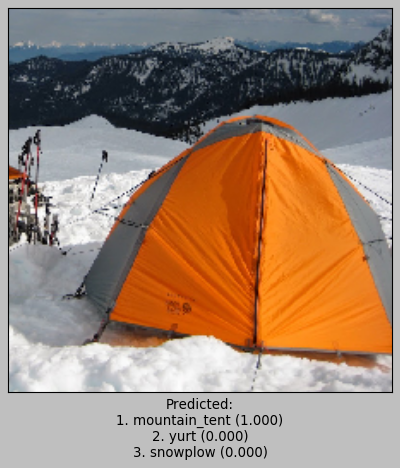

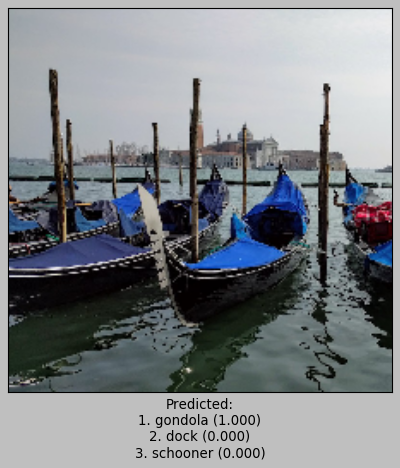

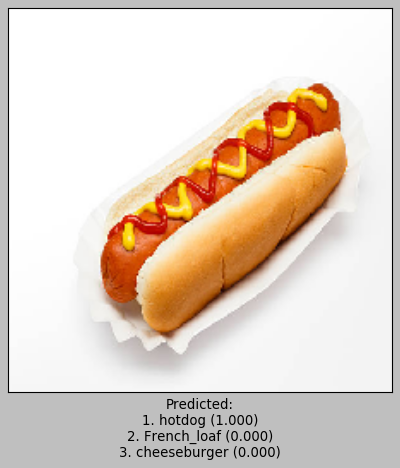

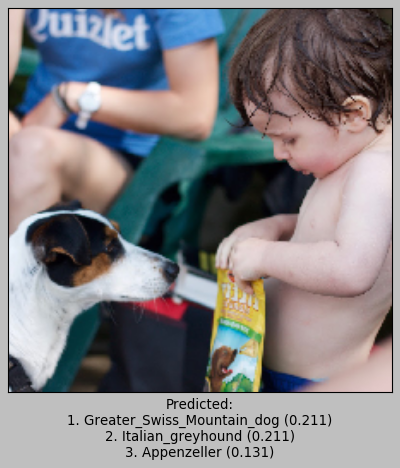

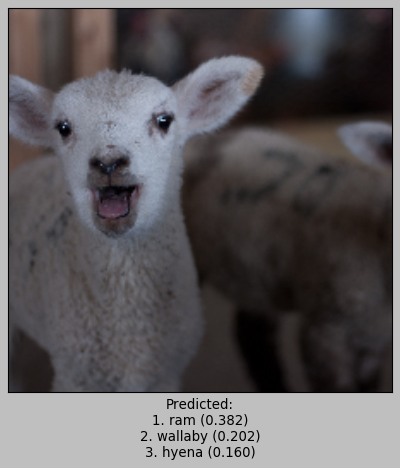

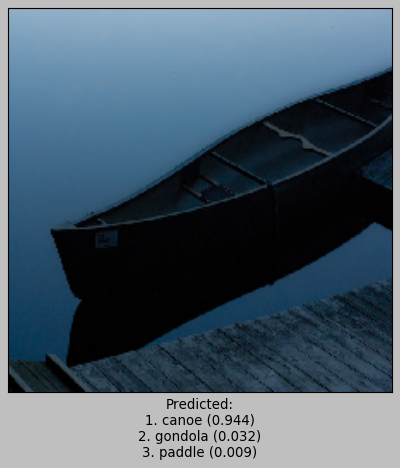

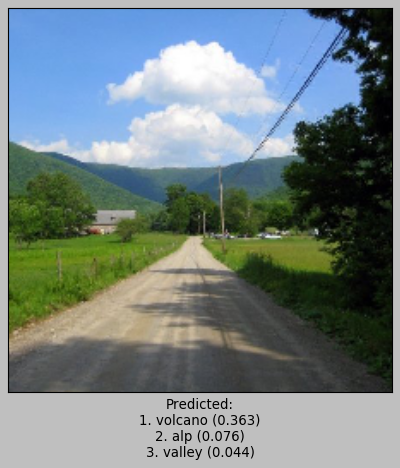

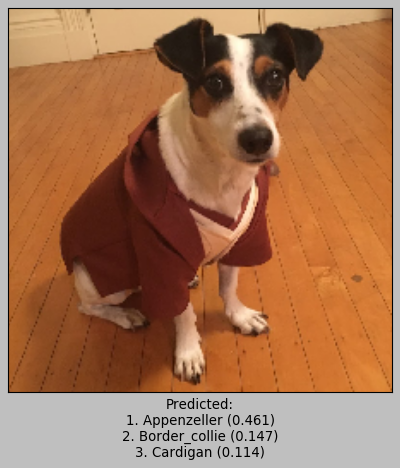

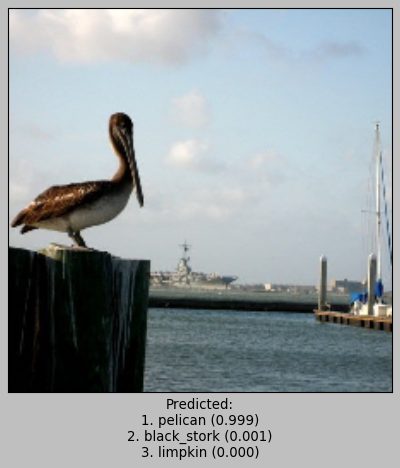

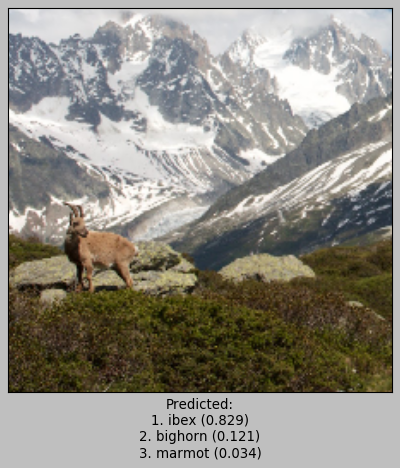

In [45]:
import glob

plt.style.use('classic')

for fname in glob.glob('*.jpg'):
    img = image.load_img(fname, target_size=(224, 224))
    plt.figure()
    plt.imshow(img)
    plt.yticks([])
    plt.xticks([])

    plt.xlabel(convert_and_predict(img))